In [8]:
#impoert laibraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_auc_score, roc_curve
)
import seaborn as sns
import os


In [30]:


# -------------------------
# 1. Load dataset
# -------------------------
df = pd.read_csv(r"D:\mydata\Elevate Labs\task5\heart.csv")
print("Dataset shape:", df.shape)
print("Columns:", df.columns.tolist())
print(df.head())

# -------------------------
# 2. Quick preprocessing
# -------------------------
# Target column is 'target' (0 = no disease, 1 = disease) as identified earlier
# Check for missing values
print("\nMissing values per column:\n", df.isnull().sum())



Dataset shape: (1025, 14)
Columns: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  

Missing values per column:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      

In [32]:
# If there are any categorical columns encoded as numbers, they can be kept as-is for tree-based models.
# But we'll scale features for models that might benefit from it (not required for trees).
X = df.drop("target", axis=1)
y = df["target"]

# Feature names for plotting
feature_names = X.columns.tolist()

# Choose a depth that balances bias/variance (pick depth with best test score)
best_depth_idx = np.argmax(test_scores)
best_depth = depths[best_depth_idx]
print(f"Best max_depth by test accuracy: {best_depth} (test acc = {test_scores[best_depth_idx]:.4f})")

# Retrain a tree with best_depth
dt_best = DecisionTreeClassifier(max_depth=best_depth, random_state=RANDOM_STATE)
dt_best.fit(X_train, y_train)
y_pred_dt_best = dt_best.predict(X_test)
print("\nDecision Tree (best depth) classification report:\n", classification_report(y_test, y_pred_dt_best))

# -------------------------
# 6. Random Forest - training and comparison
# -------------------------
rf = RandomForestClassifier(n_estimators=200, max_depth=None, random_state=RANDOM_STATE, n_jobs=-1)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]

Best max_depth by test accuracy: 9 (test acc = 0.9854)

Decision Tree (best depth) classification report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       100
           1       1.00      0.97      0.99       105

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



In [34]:
# Train/test split (stratify to preserve class balance)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE, stratify=y
)

# Standard scaling (optional for tree-based models, but used for consistency and if other models are later used)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# -------------------------
# 3. Decision Tree - baseline
# -------------------------
dt_default = DecisionTreeClassifier(random_state=RANDOM_STATE)
dt_default.fit(X_train, y_train)  # trees do not require scaling; using raw X_train

y_pred_dt = dt_default.predict(X_test)
y_prob_dt = dt_default.predict_proba(X_test)[:, 1] if hasattr(dt_default, "predict_proba") else None


=== Decision Tree Evaluation ===
Accuracy: 0.9853658536585366
Precision: 1.0
Recall: 0.9714285714285714
F1: 0.9855072463768116
ROC-AUC: 0.9857142857142858

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       100
           1       1.00      0.97      0.99       105

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



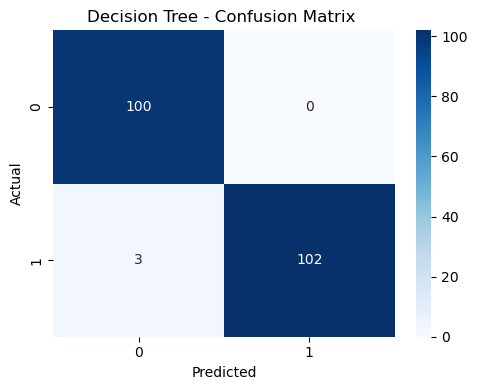

In [38]:
print("\n=== Decision Tree Evaluation ===")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Precision:", precision_score(y_test, y_pred_dt))
print("Recall:", recall_score(y_test, y_pred_dt))
print("F1:", f1_score(y_test, y_pred_dt))
if y_prob_dt is not None:
    print("ROC-AUC:", roc_auc_score(y_test, y_prob_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))

# Confusion matrix plot
cm = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Decision Tree - Confusion Matrix ")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

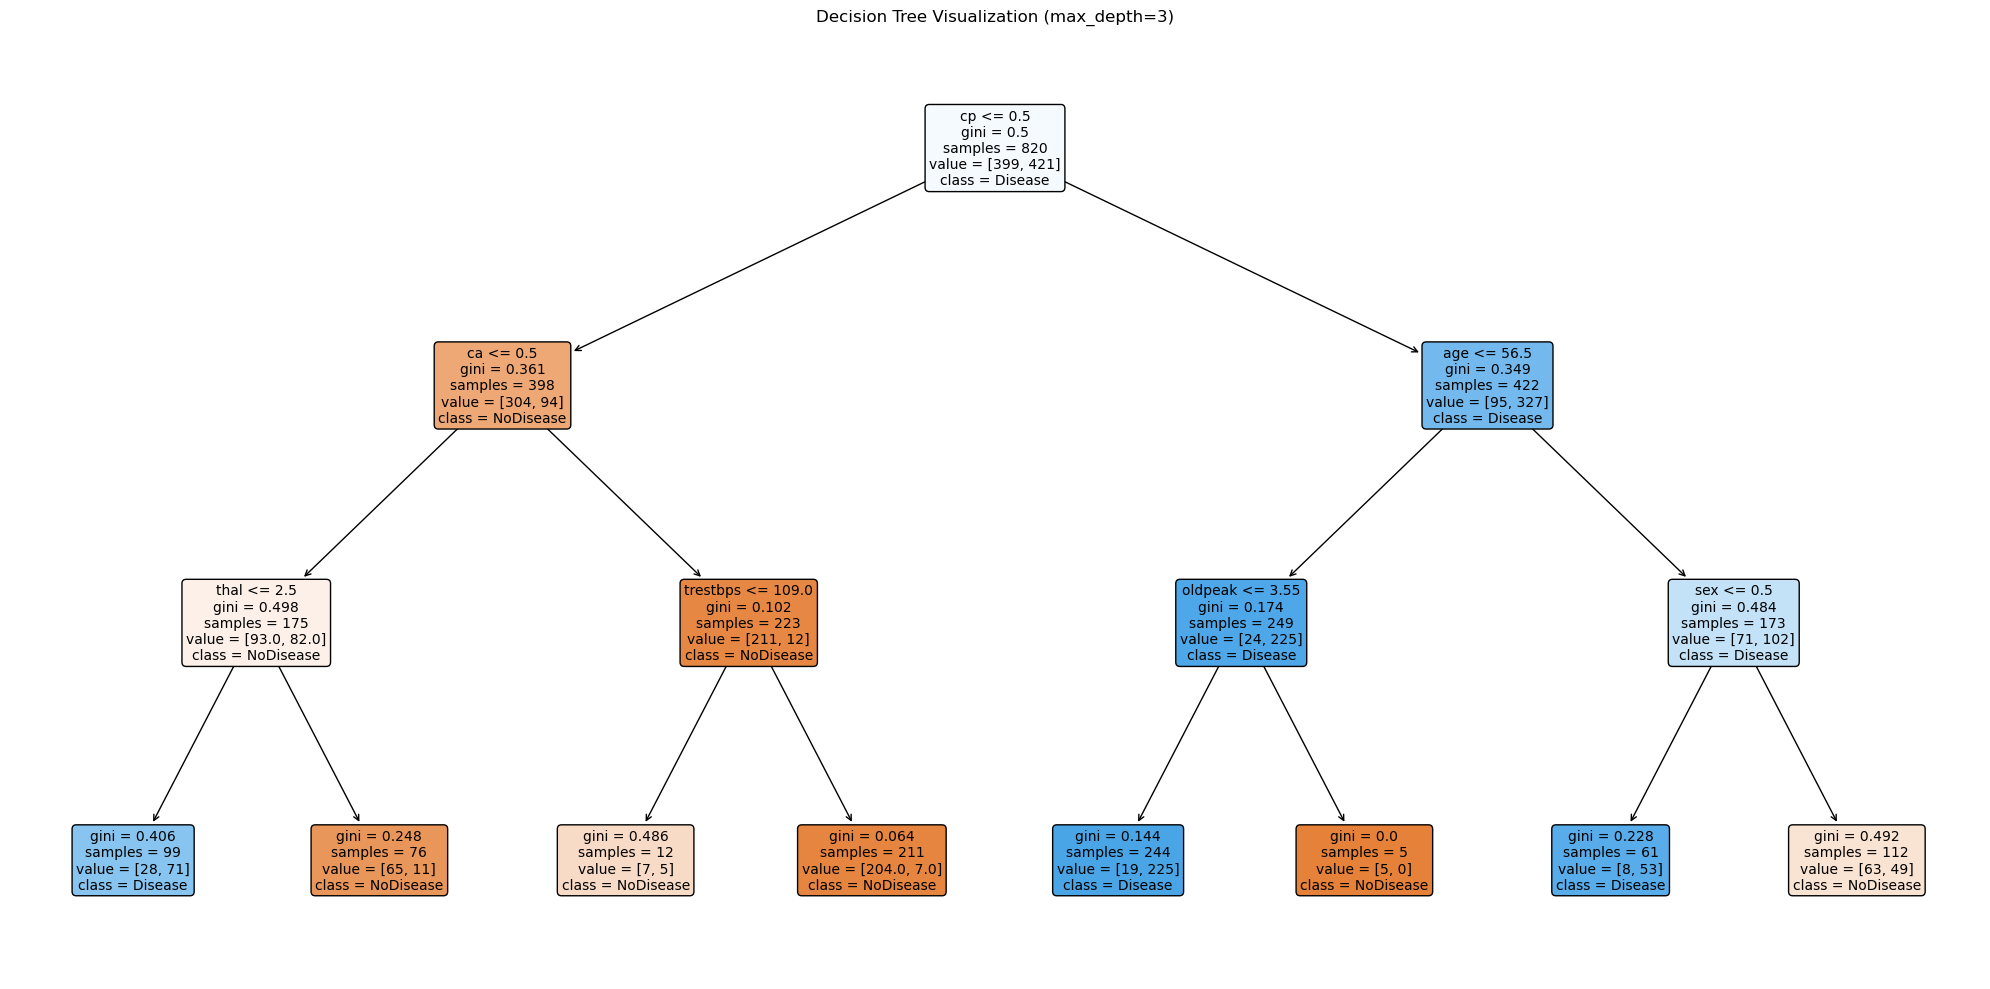

In [40]:
# -------------------------
# 4. Visualize the tree (pruned / limited depth for readability)
# -------------------------
# Limit depth for visualization so it's readable
viz_depth = 3
dt_viz = DecisionTreeClassifier(max_depth=viz_depth, random_state=RANDOM_STATE)
dt_viz.fit(X_train, y_train)

plt.figure(figsize=(20,10))
plot_tree(dt_viz, feature_names=feature_names, class_names=["NoDisease","Disease"], filled=True, rounded=True, fontsize=10)
plt.title(f"Decision Tree Visualization (max_depth={viz_depth})")
plt.tight_layout()
plt.show()


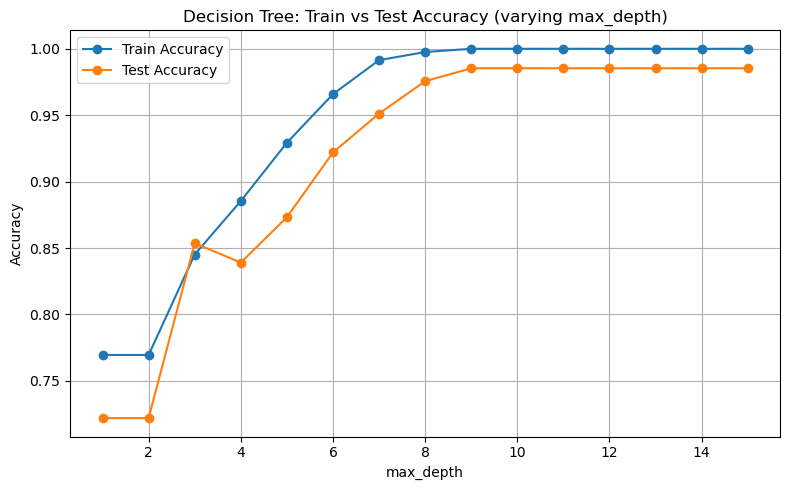

In [42]:
# -------------------------
# 5. Overfitting analysis: vary max_depth and record train/test scores
# -------------------------
depths = list(range(1, 16))  # 1..15
train_scores = []
test_scores = []

for d in depths:
    dt = DecisionTreeClassifier(max_depth=d, random_state=RANDOM_STATE)
    dt.fit(X_train, y_train)
    train_scores.append(dt.score(X_train, y_train))
    test_scores.append(dt.score(X_test, y_test))

plt.figure(figsize=(8,5))
plt.plot(depths, train_scores, marker='o', label='Train Accuracy')
plt.plot(depths, test_scores, marker='o', label='Test Accuracy')
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.title("Decision Tree: Train vs Test Accuracy (varying max_depth)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [15]:
print("\n=== Random Forest Evaluation ===")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1:", f1_score(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))


=== Random Forest Evaluation ===
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1: 1.0
ROC-AUC: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       105

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



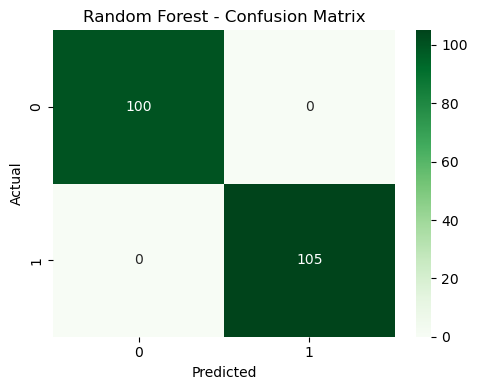


Top features by importance (Random Forest):
 cp          0.144796
thalach     0.118097
ca          0.110965
oldpeak     0.105590
thal        0.101825
age         0.091826
chol        0.076579
exang       0.074189
trestbps    0.071178
slope       0.045234
sex         0.029885
restecg     0.019166
fbs         0.010670
dtype: float64


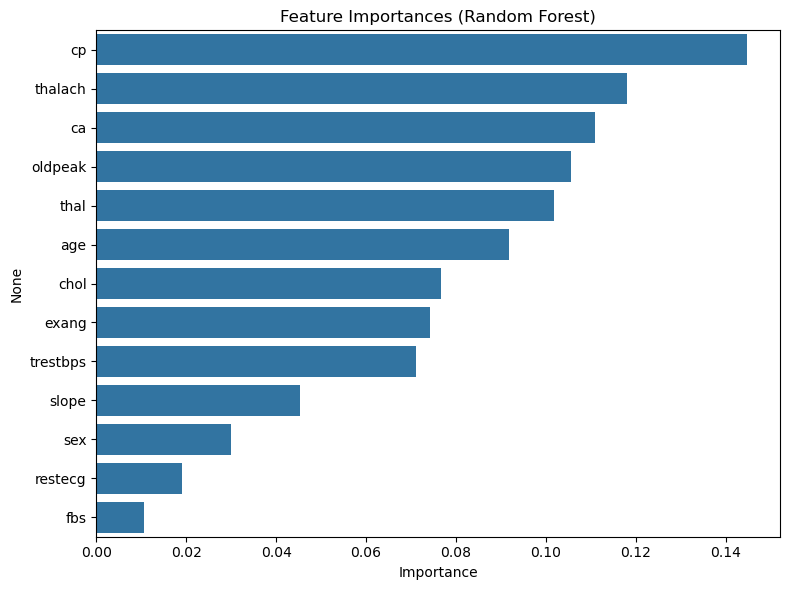

In [16]:
# Confusion matrix for RF
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(5,4))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Greens")
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# -------------------------
# 7. Feature importances
# -------------------------
importances = rf.feature_importances_
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)
print("\nTop features by importance (Random Forest):\n", feat_imp.head(15))

# Plot importances
plt.figure(figsize=(8,6))
sns.barplot(x=feat_imp.values, y=feat_imp.index)
plt.title("Feature Importances (Random Forest)")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()


Decision Tree (max_depth=9) CV Accuracy: mean=0.9971, std=0.0059
Random Forest CV Accuracy: mean=0.9961, std=0.0078


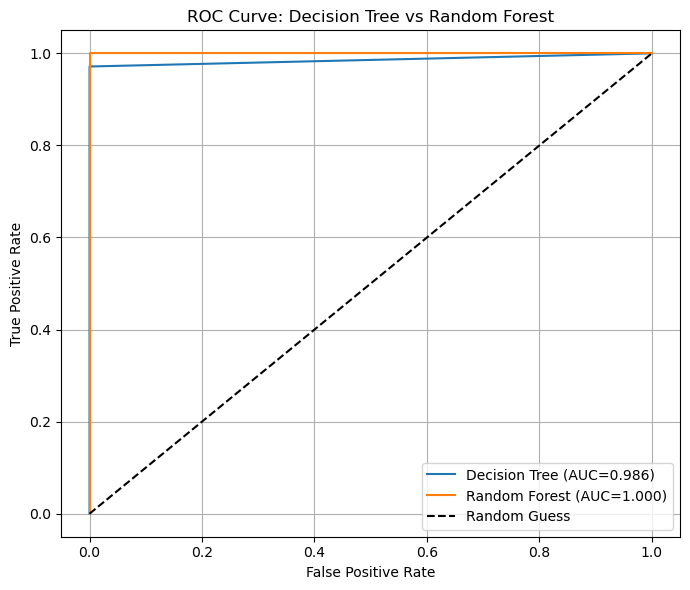

In [17]:
# -------------------------
# 8. Cross-validation evaluation
# -------------------------
skf = StratifiedKFold(n_splits=CV_FOLDS, shuffle=True, random_state=RANDOM_STATE)

dt_cv_scores = cross_val_score(DecisionTreeClassifier(max_depth=best_depth, random_state=RANDOM_STATE),
                               X, y, cv=skf, scoring='accuracy', n_jobs=-1)
rf_cv_scores = cross_val_score(RandomForestClassifier(n_estimators=200, random_state=RANDOM_STATE, n_jobs=-1),
                               X, y, cv=skf, scoring='accuracy', n_jobs=-1)

print(f"\nDecision Tree (max_depth={best_depth}) CV Accuracy: mean={dt_cv_scores.mean():.4f}, std={dt_cv_scores.std():.4f}")
print(f"Random Forest CV Accuracy: mean={rf_cv_scores.mean():.4f}, std={rf_cv_scores.std():.4f}")

# -------------------------
# 9. ROC Curve comparison (DT best vs RF)
# -------------------------
fpr_dt, tpr_dt, _ = roc_curve(y_test, dt_best.predict_proba(X_test)[:,1])
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)

plt.figure(figsize=(7,6))
plt.plot(fpr_dt, tpr_dt, label=f"Decision Tree (AUC={roc_auc_score(y_test, dt_best.predict_proba(X_test)[:,1]):.3f})")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC={roc_auc_score(y_test, y_prob_rf):.3f})")
plt.plot([0,1],[0,1],"k--", label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve: Decision Tree vs Random Forest")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [18]:
# -------------------------
# 10. Save feature importance values to CSV
# -------------------------
feat_imp.to_csv(os.path.join(PLOTS_DIR, "rf_feature_importances.csv"))
print(f"Feature importances saved to: {os.path.join(PLOTS_DIR, r'D:\mydata\Elevate Labs\task5\rf_feature_importances.csv')}")

# -------------------------
# 11. Final summary
# -------------------------
print("\n--- Final summary ---")
print(f"Decision Tree (default) test accuracy: {accuracy_score(y_test, y_pred_dt):.4f}")
print(f"Decision Tree (best depth={best_depth}) test accuracy: {accuracy_score(y_test, y_pred_dt_best):.4f}")
print(f"Random Forest (n_estimators=200) test accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")

Feature importances saved to: D:\mydata\Elevate Labs\task5\rf_feature_importances.csv

--- Final summary ---
Decision Tree (default) test accuracy: 0.9854
Decision Tree (best depth=9) test accuracy: 0.9854
Random Forest (n_estimators=200) test accuracy: 1.0000
